In [53]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [2]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = 200

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

In [3]:
training = ['para', 'ferro']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)


In [75]:
data = auxLib.SyntheticImagesGen(training=training, L=L)

# Generate synthetic data

train_images, train_labels = data.dataGenerator(10000)
test_images, test_labels = data.dataGenerator(1000)

train_images = train_images.reshape((10000, L * L))
test_images = test_images.reshape((1000, L * L))

Generating synthetic data...
Done!
Elapsed time: 0.6770591735839844 seconds
Generating synthetic data...
Done!
Elapsed time: 0.033100128173828125 seconds


# Creating and training models

Now we should use the results of the critical temperatures of each training to decide what number of neurons will we use for percolation problem. We will use 200 neurons.

In [76]:
np.random.seed(seed)

kernel_regularizer=tf.keras.regularizers.l2(0.01)

dnn = auxLib.DenseNeuralNetworkGen() # Initializing. It generates the model

dnn.build_model((L*L,), num_classes=2, layers=[
{'type': 'dense', 'units': neurons, 'activation': 'relu', 'kernel_regularizer': kernel_regularizer},
{'type': 'dropout', 'rate': 0.2},
{'type': 'dense', 'units': 2, 'activation': 'softmax'} #2 is the number of classes: Paramagnetic and ferromagnetic
])

dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.summary()

dnn.fit(train_images, train_labels, 
		epochs=50, batch_size=20,
		validation_data=(test_images, test_labels), 
		callbacks=[callbacks],
		verbose=False)

dnn.save_weights(f'dnn_n{neurons}_DO02', directory=modelsfolder) # name of the model (exclude the 'weights' and the extension)
dnn.save_model(f'dnn_n{neurons}_DO02', directory=modelsfolder)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               320200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 402       
                                                                 
Total params: 320602 (1.22 MB)
Trainable params: 320602 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Accuracy is high enough, so cancelling training!
Model saved as d:\Facultad\Doctorado\Proyectos\paper\DNN\Para_Ferro\models\2024-08-20\dnn_n200_DO02.h5


C:\Users\Usuario\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Predictions

In [77]:
# Simulated images

loader_init = auxLib.loader_and_saver(os.getcwd())


In [78]:

for densitiy_index, density in enumerate(densities):
    
    sim_images, temperature = loader_init.simulatedImages(densitiy_index)

    model_path = os.path.join(modelsfolder, f'dnn_n{neurons}_DO02.h5')

    dnn = keras.models.load_model(model_path)

    prediction = auxLib.predictor(L, dnn, sim_images, 
                                name=f'{densities_str[densitiy_index]}',
								training=training,
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)


Loading simulated images...


Loading arrays: 100%|██████████| 196/196 [00:04<00:00, 47.05array/s]


Files loaded!
Data of density p = 0.55 succesfully loaded.


Predicting: 100%|██████████| 195/195 [00:34<00:00,  5.59repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 150/150 [00:05<00:00, 27.45array/s]


Files loaded!
Data of density p = 0.6 succesfully loaded.


Predicting: 100%|██████████| 149/149 [00:28<00:00,  5.26repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 199/199 [00:13<00:00, 14.94array/s]


Files loaded!
Data of density p = 0.61 succesfully loaded.


Predicting: 100%|██████████| 198/198 [00:54<00:00,  3.64repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 187/187 [00:04<00:00, 43.70array/s]


Files loaded!
Data of density p = 0.62 succesfully loaded.


Predicting: 100%|██████████| 186/186 [00:26<00:00,  6.97repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 163/163 [00:03<00:00, 41.62array/s]


Files loaded!
Data of density p = 0.63 succesfully loaded.


Predicting: 100%|██████████| 162/162 [00:22<00:00,  7.16repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 142/142 [00:03<00:00, 46.17array/s]


Files loaded!
Data of density p = 0.64 succesfully loaded.


Predicting: 100%|██████████| 141/141 [00:20<00:00,  6.88repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 161/161 [00:03<00:00, 45.54array/s]


Files loaded!
Data of density p = 0.65 succesfully loaded.


Predicting: 100%|██████████| 160/160 [00:25<00:00,  6.39repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 151/151 [00:07<00:00, 20.79array/s]


Files loaded!
Data of density p = 0.7 succesfully loaded.


Predicting: 100%|██████████| 150/150 [01:03<00:00,  2.36repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 155/155 [00:07<00:00, 20.71array/s]


Files loaded!
Data of density p = 0.8 succesfully loaded.


Predicting: 100%|██████████| 154/154 [00:32<00:00,  4.69repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 139/139 [00:08<00:00, 15.83array/s]


Files loaded!
Data of density p = 0.9 succesfully loaded.


Predicting: 100%|██████████| 138/138 [00:32<00:00,  4.31repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:07<00:00, 22.07array/s]


Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:47<00:00,  3.27repetitions/s]


# Calculating critical temperature

Prediction for rho = 0.55
T_c = 0
Prediction for rho = 0.6
T_c = 0.7967270603549018
Prediction for rho = 0.61
T_c = 0.8622457198031227
Prediction for rho = 0.62
T_c = 0.9094924420081046
Prediction for rho = 0.63
T_c = 0.95242188343423
Prediction for rho = 0.64
T_c = 1.00980376022213
Prediction for rho = 0.65
T_c = 1.080581520309436
Prediction for rho = 0.7
T_c = 1.2796979685621028
Prediction for rho = 0.8
T_c = 1.6971403596136234
Prediction for rho = 0.9
T_c = 2.071986221126026
Prediction for rho = 1.0
T_c = 2.3962833551948433


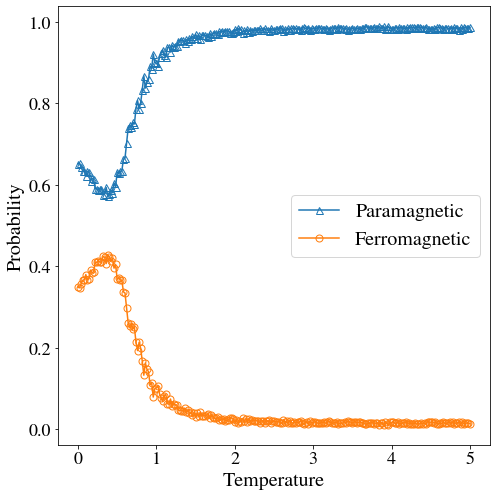

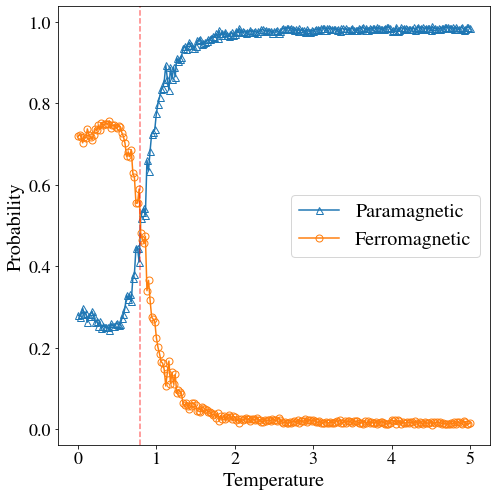

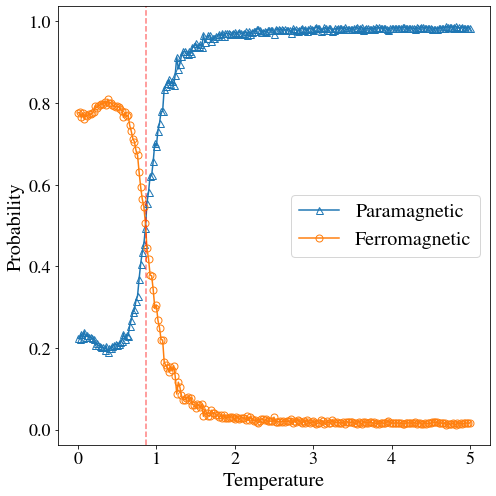

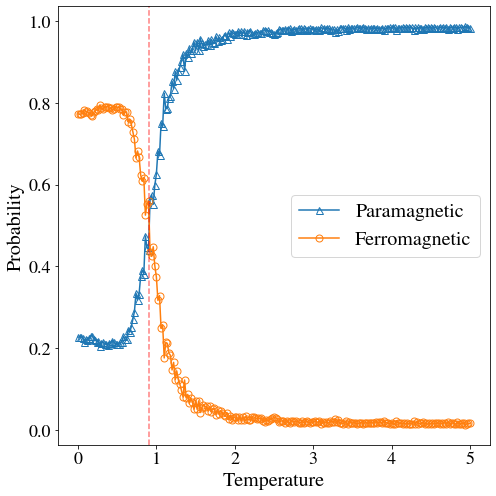

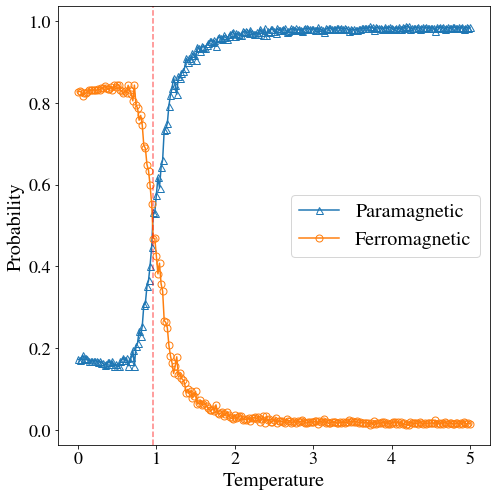

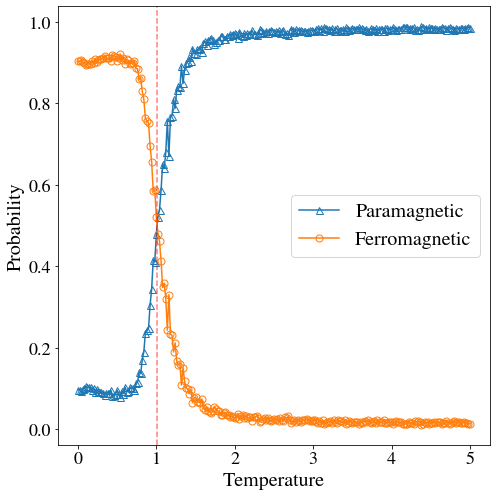

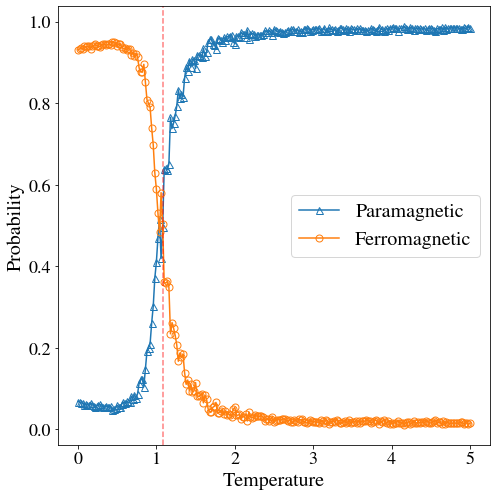

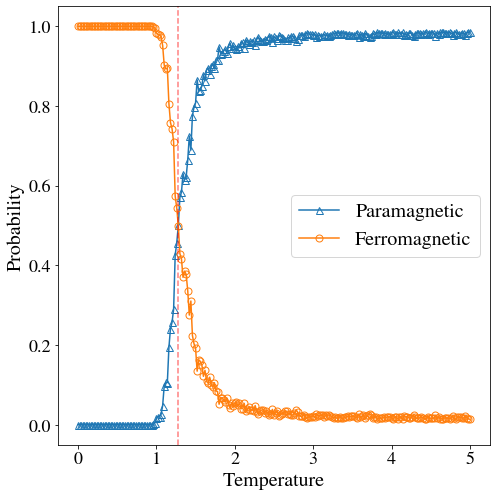

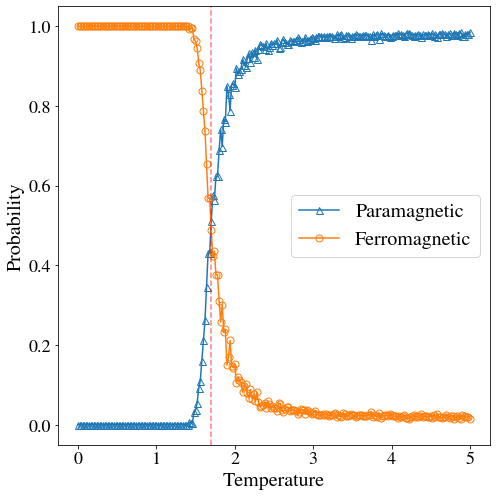

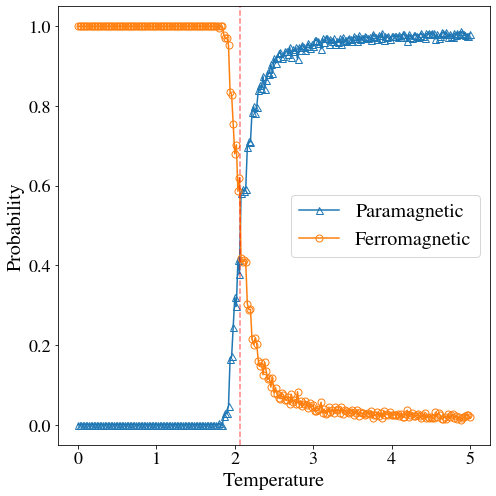

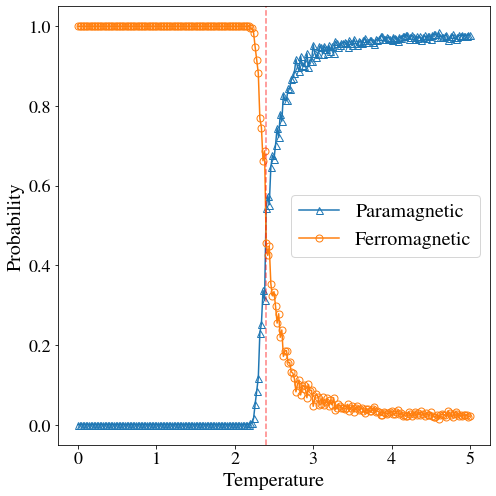

In [79]:
critical_temperatures = []

for density_index, density in enumerate(densities):
    prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)
    temperature, para, ferro = prediction.T

    print(f'Prediction for rho = {density}')

    plt.figure(figsize=(7, 7))
    plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
    plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
    plt.xlabel('Temperature')
    plt.ylabel('Probability')
    plt.legend()

    if max(ferro)<0.5:
        tc = 0
    else:
        index_half = np.where(ferro > 0.5)[0][-1]
        if index_half == 250:
            index_half = 249
        # Interpolation:
        tc = temperature[index_half] + (ferro[index_half]-0.5)*(temperature[index_half+1] - temperature[index_half]) / (ferro[index_half] - ferro[index_half+1])
        plt.axvline(x=tc,  color = 'red', linestyle = '--', alpha = 0.5)

    critical_temperatures.append(tc)
    print(f'T_c = {tc}')
    plt.savefig(os.path.join(resultsfolder, f'critical_temperature_{densities_str[density_index]}.pdf'))
plt.show()

# $T_c$ vs $\rho$

In [80]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(resultsfolder, 'critical_temperatures_vs_density.csv'), index=False)

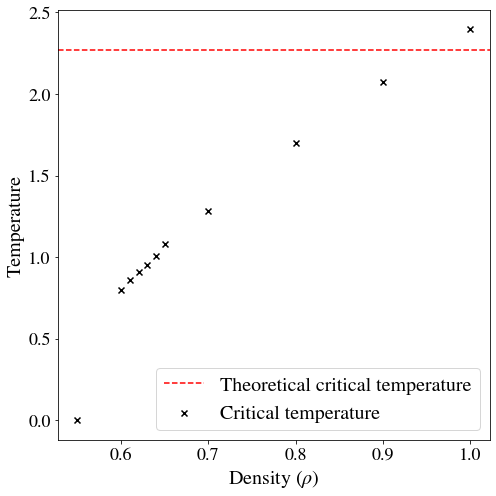

In [81]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature'], marker='x', color='black', label='Critical temperature')
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='lower right')
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()

Using the critical temperature scaled by the critical temperature at $\rho=1$ and comparing with the theoretical curve we get

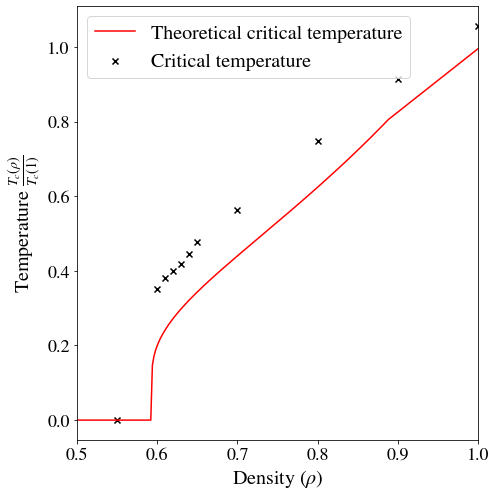

In [82]:
temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel(r'Temperature $\frac{T_c(\rho)}{T_c(1)}$')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()


## Fitting

In [6]:
training = ['para', 'ferro']

modelsfolder, resultsfolder = auxLib.folders(directory='2024-08-20', training=training, percolation=True)

[0.18767008 0.59667331 0.77071008]


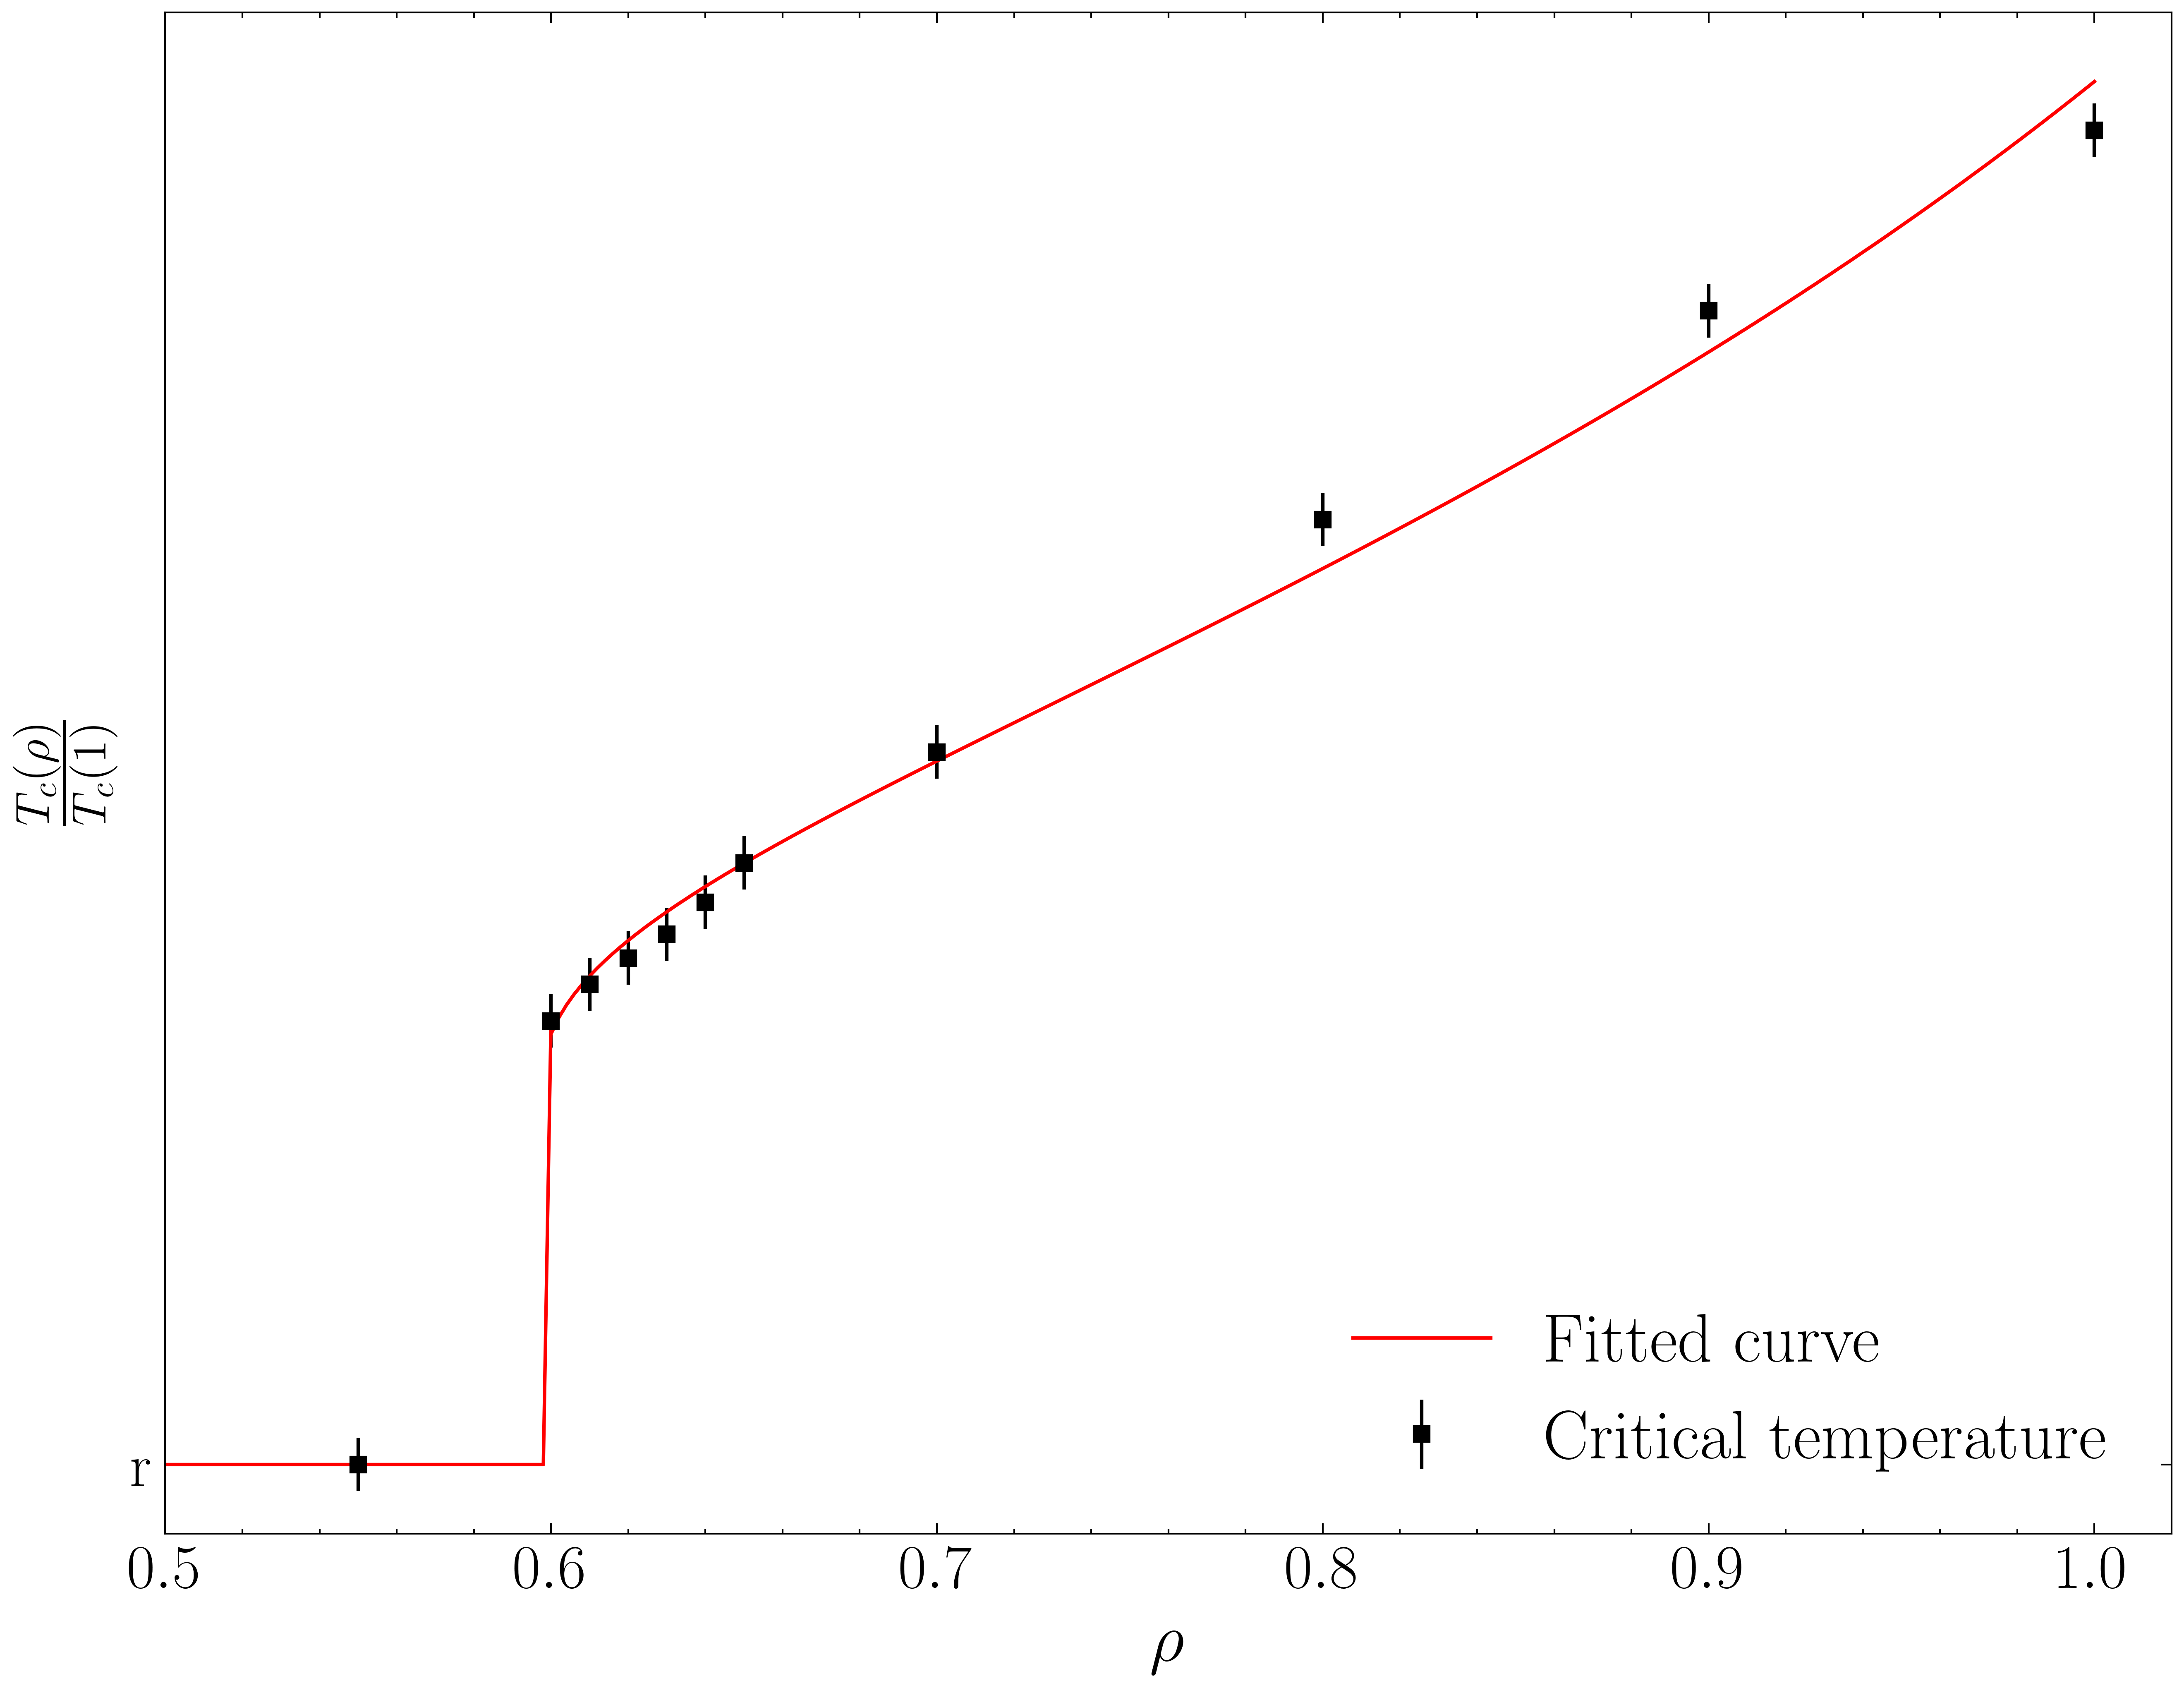

In [55]:
from scipy.optimize import curve_fit

def model_function(x, A, B, K):
	return - K/np.log(x-B) + A

temp = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

initial_guesses = [0.0, 0.592746, 1.0]

tc_rho1 = temp['Temperature'].to_numpy(float)[-1]
#tc_rho1 = 2.269

popt, pcov = curve_fit(model_function, temp['Density'][1:], temp['Temperature'][1:]/tc_rho1, p0=initial_guesses)

print(popt)

# Fitting parameters of theoretical curve
x_curve = np.arange(0.0,0.602,0.002)
y_curve = x_curve*0
y_curve[-1] = model_function(sim_density[1], *popt)



sim_density = np.arange(0.6,1.002,0.002)

plt.figure(figsize=(9, 7))
plt.errorbar(temp['Density'],temp['Temperature']/tc_rho1,
			color='black',
			yerr=0.02,
			fmt='s',
			markersize=4,
			label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, model_function(sim_density, *popt),'r', label = 'Fitted curve')
plt.plot(x_curve, y_curve,'-','r')

plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='lower right')
plt.xlim(0.5,1.02)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density(fit).pdf'))
plt.show()

# Half-height

Prediction for rho = 0.55


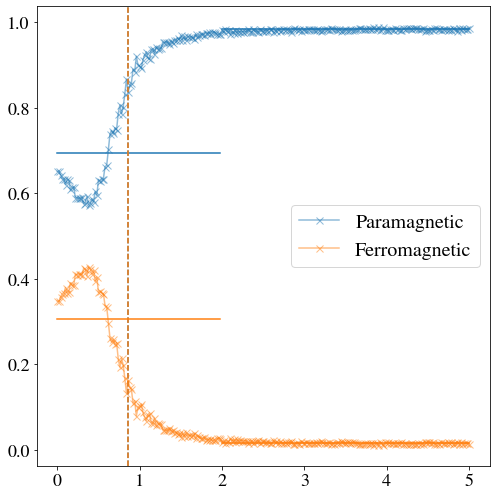

Prediction for rho = 0.6


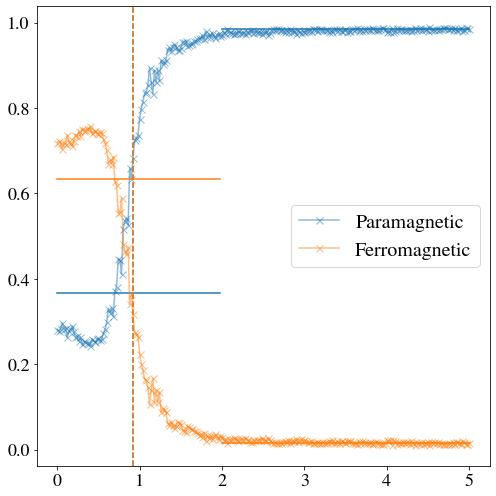

Prediction for rho = 0.61


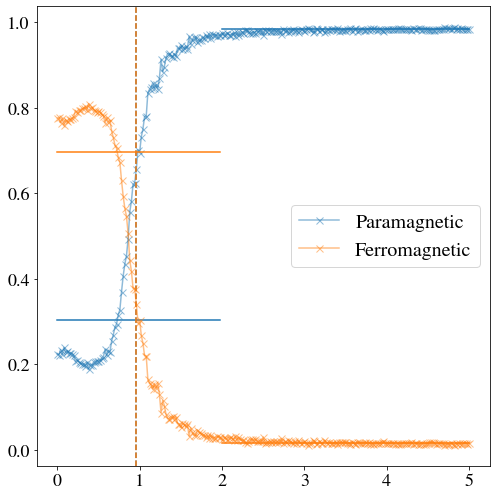

Prediction for rho = 0.62


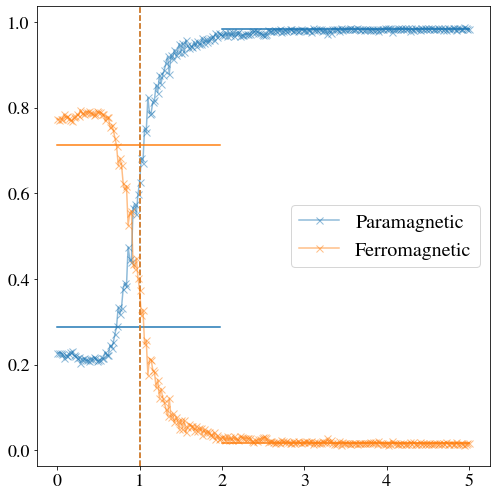

Prediction for rho = 0.63


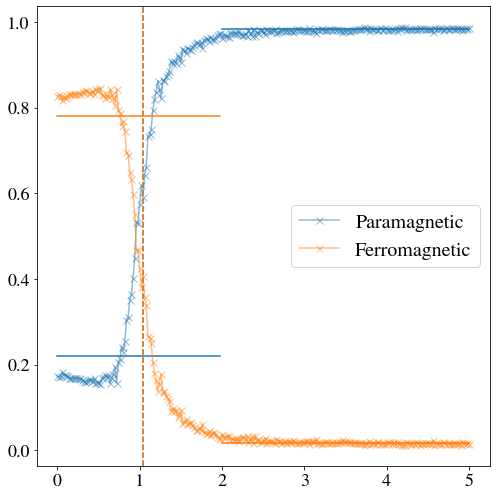

Prediction for rho = 0.64


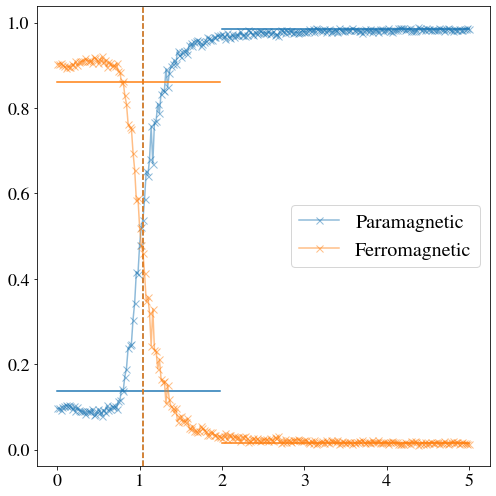

Prediction for rho = 0.65


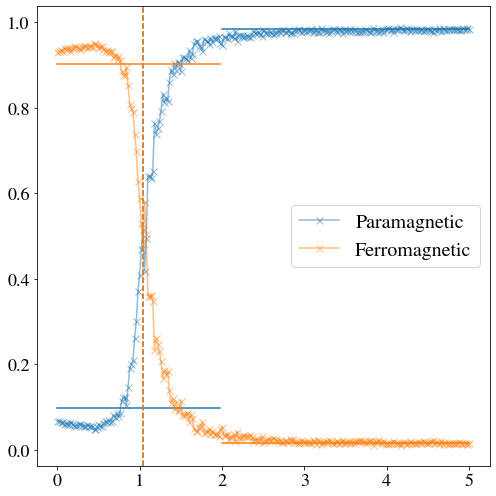

Prediction for rho = 0.7


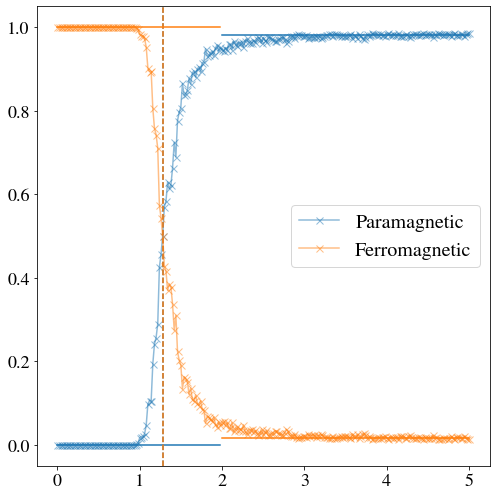

Prediction for rho = 0.8


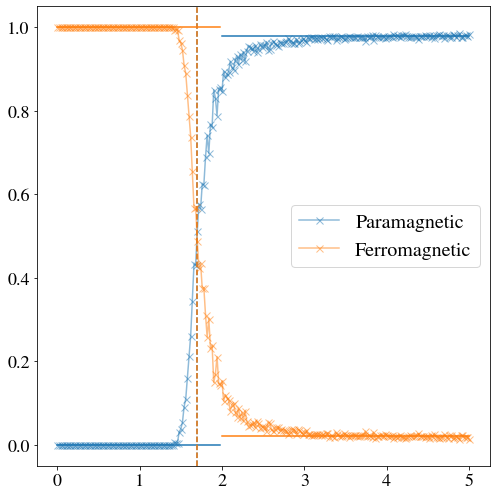

Prediction for rho = 0.9


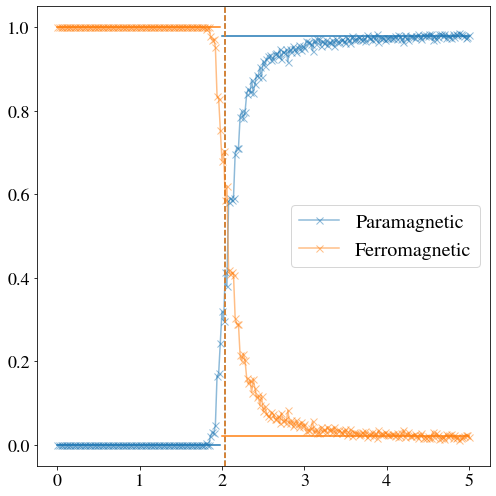

Prediction for rho = 1.0


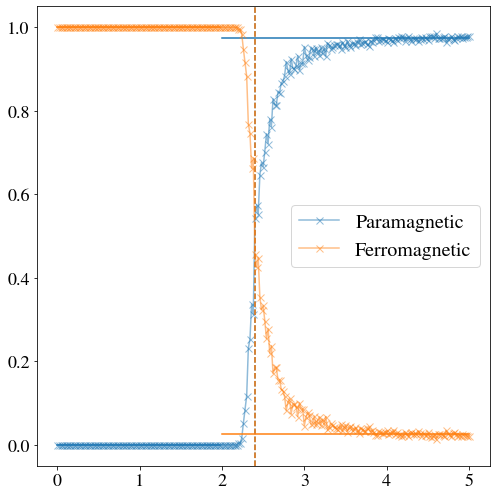

In [84]:
training = ['para','ferro']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)
saving_folder = os.path.join(resultsfolder,'Half-height')
os.makedirs(saving_folder, exist_ok = True)

critical_temperatures = []

for density_index, density in enumerate(densities):
	print(f'Prediction for rho = {density}')
	tc, plot = auxLib.half_height(resultsfolder, name=f'predictions_{densities_str[density_index]}', prediction=None, graph=True)
	plot.savefig(saving_folder+f'/critical_temperature_{densities_str[density_index]}.pdf') #saving the figure
	plot.show()
	critical_temperatures.append(tc)

In [85]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(saving_folder, 'critical_temperatures_vs_density(half).csv'), index=False)

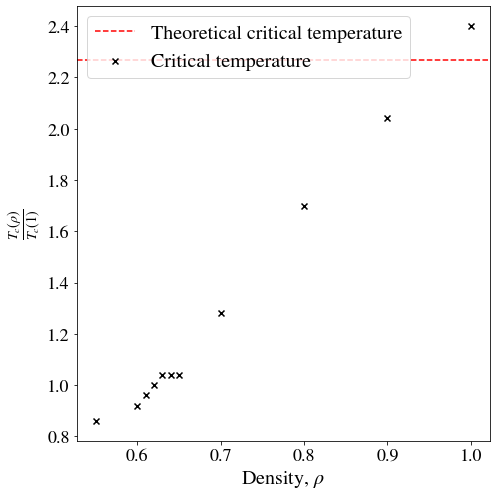

In [86]:
data_df = pd.read_csv(os.path.join(saving_folder,f'critical_temperatures_vs_density(half).csv'), header=0)

plt.figure(figsize=(7, 7))

plt.scatter(data_df['Density'], data_df['Temperature'], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel(r'Density, $\rho$')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')


plt.legend()
plt.savefig(os.path.join(saving_folder, 'critical_temperature_vs_density(half).pdf'))
plt.show()

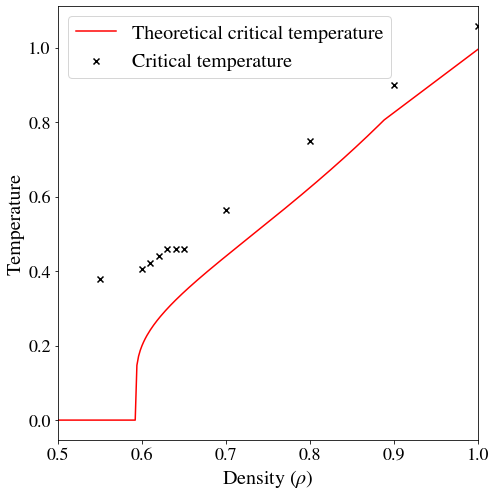

In [87]:
temp = pd.read_csv(os.path.join(saving_folder, f'critical_temperatures_vs_density(half).csv'))

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

plt.figure(figsize=(7, 7))
plt.scatter(temp['Density'],temp['Temperature']/2.269, marker='x', color='black', label='Critical temperature')#np.array(temp_df['Temperatura'])[-1],'x--')
plt.plot(sim_density, theoretical_curve,'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel('Temperature')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), resultsfolder, 'critical_temperatures_vs_density.pdf'))
plt.show()


# Error function

In [88]:
from scipy.special import erf
from scipy.optimize import curve_fit

def erf_model(x, A, B, C, D):
    return A * erf(B * (x - C)) + D

initial_guess = [-0.5, 11.6, 2.32, 0.5]

# Perform the curve fitting
popt, pcov = curve_fit(erf_model, temperature, ferro, p0=initial_guess)
A_opt, B_opt, C_opt, D_opt = popt

Prediction for rho = 0.55


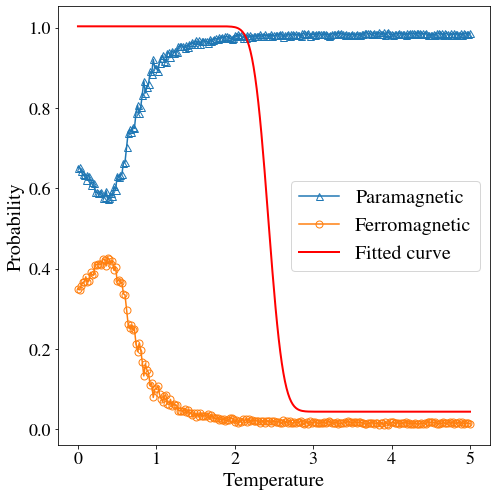

Prediction for rho = 0.6


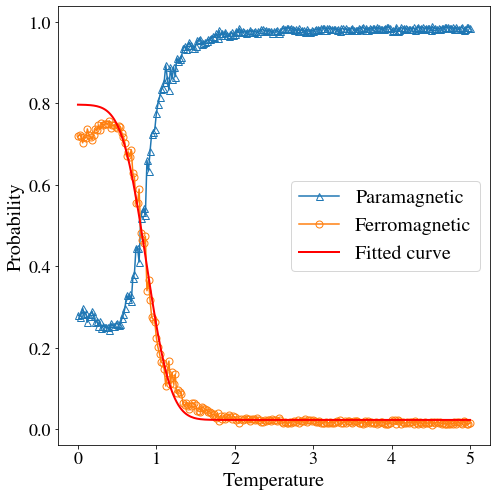

Prediction for rho = 0.61


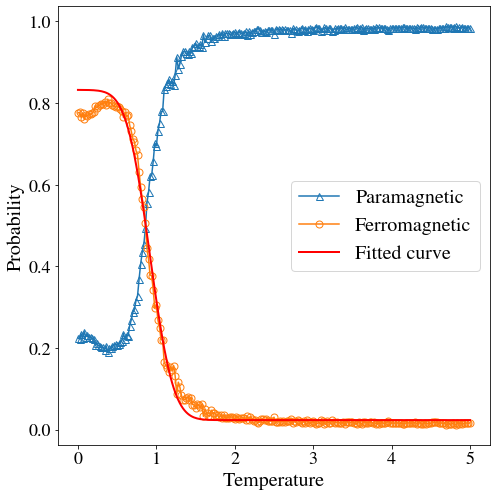

Prediction for rho = 0.62


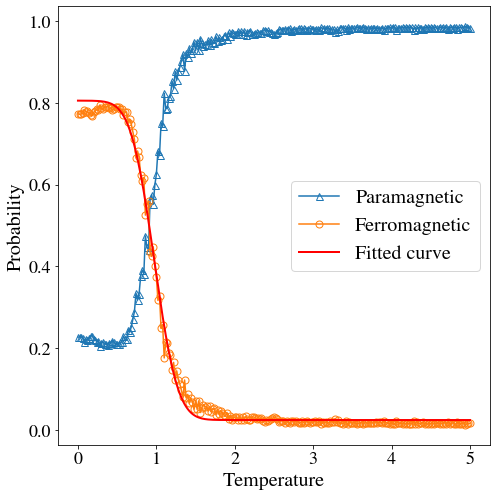

Prediction for rho = 0.63


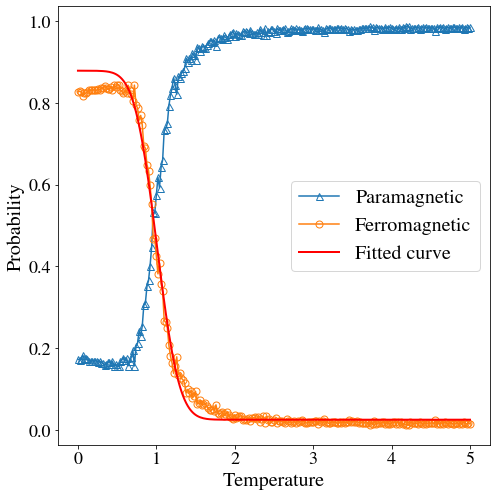

Prediction for rho = 0.64


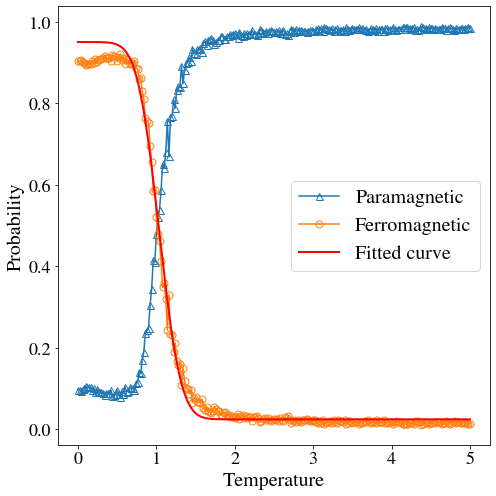

Prediction for rho = 0.65


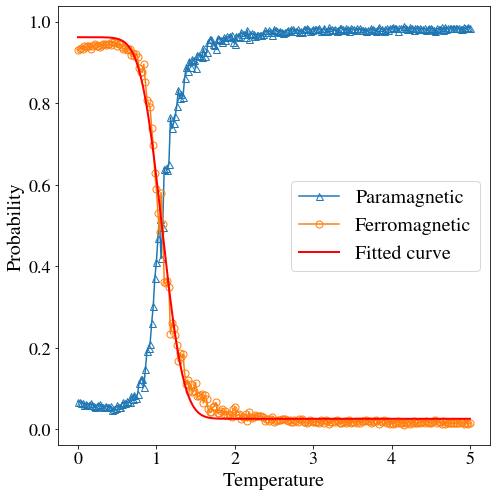

Prediction for rho = 0.7


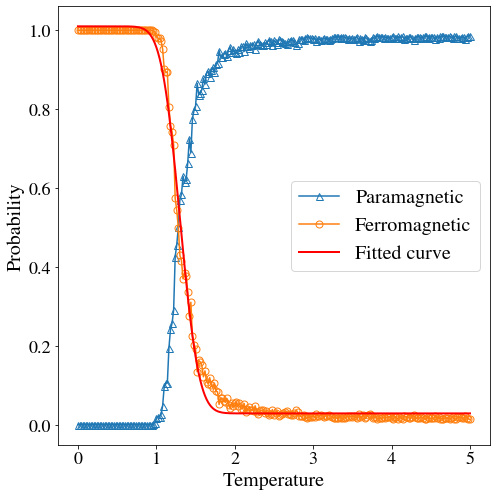

Prediction for rho = 0.8


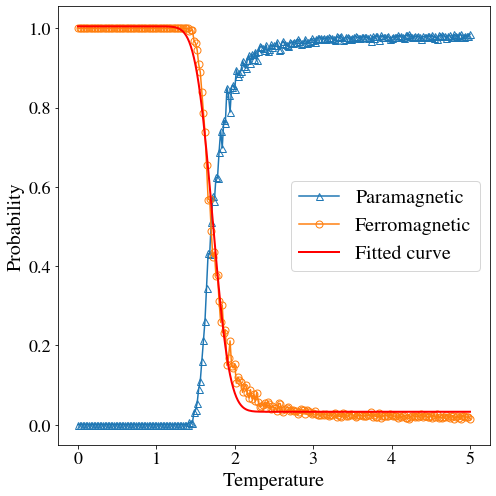

Prediction for rho = 0.9


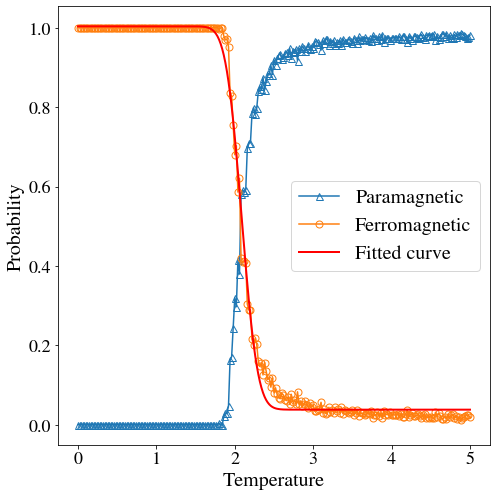

Prediction for rho = 1.0


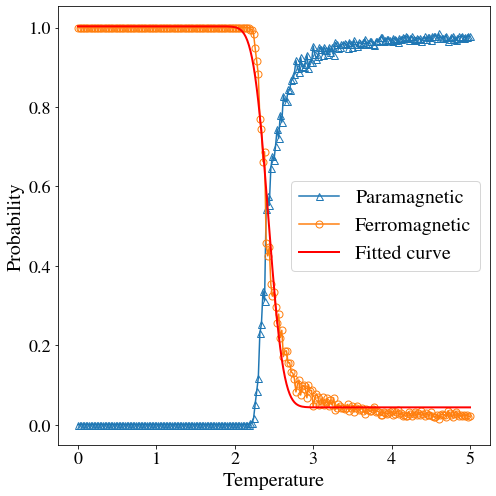

In [89]:
training = ['para','ferro']

modelsfolder, resultsfolder = auxLib.folders(directory=None, training=training, percolation=True)
saving_folder = os.path.join(resultsfolder,'Error function')
os.makedirs(saving_folder, exist_ok = True)

critical_temperatures = []

for density_index, density in enumerate(densities):
	print(f'Prediction for rho = {density}')
	prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)
	temperature, para, ferro = prediction.T
	index_of_max = np.where(ferro == np.amax(ferro))[0][0]
	if max(ferro)<0.5:
		tc = 0
	else:
		popt, pcov = curve_fit(erf_model, temperature[index_of_max:], ferro[index_of_max:], p0=initial_guess)
		tc = popt[2]
	plt.figure(figsize=(7, 7))
	plt.plot(temperature, para, '^-', label='Paramagnetic', markerfacecolor='none', markersize=7)
	plt.plot(temperature, ferro, 'o-', label='Ferromagnetic', markerfacecolor='none', markersize=7)
	plt.plot(temperature, erf_model(temperature, *popt), 'r-', label='Fitted curve', linewidth=2)
	plt.xlabel('Temperature')
	plt.ylabel('Probability')
	plt.legend()
	plot.savefig(saving_folder+f'/critical_temperature_{densities_str[density_index]}.pdf') #saving the figure
	plot.show()
	critical_temperatures.append(tc)

In [90]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature'])
temp.to_csv(os.path.join(saving_folder, 'critical_temperatures_vs_density.csv'), index=False)

[0.14347885 0.57739703 0.89180265]


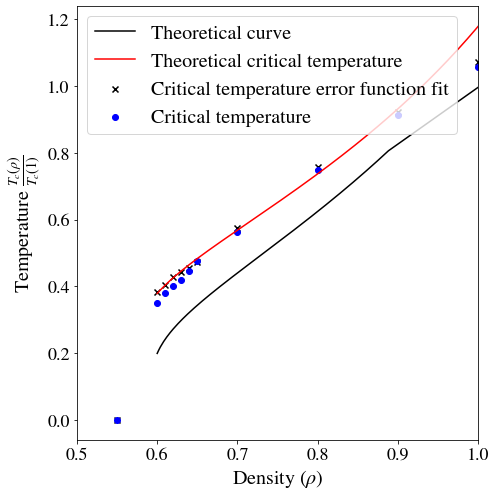

In [91]:
temp_err = pd.read_csv(os.path.join(saving_folder, f'critical_temperatures_vs_density.csv'))
temp_fifty = pd.read_csv(os.path.join(resultsfolder, f'critical_temperatures_vs_density.csv'))

sim_density = np.arange(0.6,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

def model_function(x, A, B, K):
	return - K/np.log(x-B) + A


initial_guesses = [0.0, 0.592746, 1.0]

popt, pcov = curve_fit(model_function, temp_err['Density'][1:-1], temp_err['Temperature'][1:-1]/2.269, p0=initial_guesses)

print(popt)

plt.figure(figsize=(7, 7))
plt.scatter(temp_err['Density'],temp_err['Temperature']/2.269, marker='x', color='black', label='Critical temperature error function fit')
plt.scatter(temp_fifty['Density'],temp_fifty['Temperature']/2.269, marker='o', color='blue', label='Critical temperature')
plt.plot(sim_density, theoretical_curve,'k', label = 'Theoretical curve')
plt.plot(sim_density, model_function(sim_density, *popt),'r', label = 'Theoretical critical temperature')
plt.xlabel(r'Density ($\rho$)')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')

#plt.text(800, 2.25, rf'Tc ={2.269}', color='black', 
#        verticalalignment='top', horizontalalignment='left', fontsize=20)

plt.legend(loc='upper left')
plt.xlim(0.5,1)
plt.savefig(os.path.join(os.getcwd(), saving_folder, 'critical_temperatures_vs_density.pdf'))
plt.show()